In [ ]:
pip install statsbombpy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from statsbombpy import sb
import pandas as pd
from collections import defaultdict
from matplotlib.patches import Arc
import random

In [ ]:
from sklearn.svm import SVR, SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression

gd = []
in_m = []
for [i,j] in np.array(sb.competitions()[['competition_id',"season_id"]]):
  try:
    x = sb.matches(competition_id=i, season_id=j)
  except:
    continue
  for k in range(len(x)):
    #print(i,j,k)
    f = x.iloc[k]['home_score']
    a = x.iloc[k]['away_score']
    m = x.iloc[k]['match_id']
    if f-a<0:
      gd.append(-1)
    elif f-a==0:
      gd.append(0)
    else:
      gd.append(1)
    g = generate_passes_network_data_for_starting11(m, 0)[0]
    measures = []
    measures.append(nx.average_clustering(g))
    measures.append(nx.transitivity(g))
    measures.append(nx.average_shortest_path_length(g))
    measures.append(sum(nx.degree_centrality(g).values()) / len(nx.degree_centrality(g)))
    measures.append(sum(nx.pagerank(g).values()) / len(nx.pagerank(g)))
    measures.append(sum(nx.betweenness_centrality(g).values()) / len(nx.betweenness_centrality(g)))
    measures.append(sum(nx.closeness_centrality(g).values()) / len(nx.closeness_centrality(g)))
    in_m.append(measures)
    #print(i)

le = LabelEncoder()
gd = le.fit_transform(gd)
X = np.array(in_m)
y = np.array(gd)

#model = LinearRegression()
#model.fit(X, y)
#print(model.score(X, y))

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)
print(clf.score(X, y))

#regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
#regr.fit(in_m, gd)
#print(regr.score(in_m, gd, sample_weight=None))

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)
/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)
/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)
/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)
/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not

0.6049270072992701


In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(X[:,0], y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.393


In [ ]:
sb.matches(competition_id=16, season_id=44)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


AttributeError: ignored

In [ ]:
nx.average_clustering(generate_passes_network_data_for_starting11(3752619, 0)[0])

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


0.7928901427424164

In [ ]:
len(sb.matches(competition_id=16, season_id=4))

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


1

In [ ]:
np.array(sb.competitions()[['competition_id',"season_id"]]),

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


(array([[16,  4],
        [16,  1],
        [16,  2],
        [16, 27],
        [16, 26],
        [16, 25],
        [16, 24],
        [16, 23],
        [16, 22],
        [16, 21],
        [16, 41],
        [16, 39],
        [16, 37],
        [16, 44],
        [16, 76],
        [37, 90],
        [37, 42],
        [37,  4],
        [43,  3],
        [11, 90],
        [11, 42],
        [11,  4],
        [11,  1],
        [11,  2],
        [11, 27],
        [11, 26],
        [11, 25],
        [11, 24],
        [11, 23],
        [11, 22],
        [11, 21],
        [11, 41],
        [11, 40],
        [11, 39],
        [11, 38],
        [11, 37],
        [49,  3],
        [ 2, 44],
        [55, 43],
        [72, 30]]),)

In [ ]:
sb.matches(competition_id=55, season_id=43).columns

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')

In [ ]:
sb.competitions()

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


In [ ]:
matches=sb.matches(competition_id=55, season_id=43)["match_id"]

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [ ]:
sb.matches(competition_id=55, season_id=43)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3788753,2021-06-16,15:00:00.000,Europe - UEFA Euro,2020,Finland,Russia,0,1,available,...,2021-09-22T16:39:05.697512,2,Group Stage,Saint-Petersburg Stadium,Danny Desmond Makkelie,Markku Kanerva,Stanislav Cherchesov,1.1.0,2,2
1,3788765,2021-06-20,18:00:00.000,Europe - UEFA Euro,2020,Switzerland,Turkey,3,1,available,...,2021-11-11T13:54:37.507376,3,Group Stage,Bakı Olimpiya Stadionu,Slavko Vinčić,Vladimir Petković,Şenol Güneş,1.1.0,2,2
2,3795107,2021-07-02,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Italy,1,2,available,...,2021-09-23T00:02:51.495862,5,Quarter-finals,Allianz Arena,Slavko Vinčić,Roberto Martínez Montoliú,Roberto Mancini,1.1.0,2,2
3,3795221,2021-07-07,21:00:00.000,Europe - UEFA Euro,2020,England,Denmark,2,1,available,...,2021-09-22T22:33:37.494366,6,Semi-finals,Wembley Stadium,Danny Desmond Makkelie,Gareth Southgate,Kasper Hjulmand,1.1.0,2,2
4,3795506,2021-07-11,21:00:00.000,Europe - UEFA Euro,2020,Italy,England,1,1,available,...,2021-09-22T22:40:31.690550,7,Final,Wembley Stadium,Björn Kuipers,Roberto Mancini,Gareth Southgate,1.1.0,2,2
5,3794688,2021-06-29,18:00:00.000,Europe - UEFA Euro,2020,England,Germany,2,0,available,...,2021-09-22T23:46:25.457149,4,Round of 16,Wembley Stadium,Danny Desmond Makkelie,Gareth Southgate,Joachim Löw,1.1.0,2,2
6,3794692,2021-06-29,21:00:00.000,Europe - UEFA Euro,2020,Sweden,Ukraine,1,2,available,...,2021-09-22T23:38:19.483199,4,Round of 16,Hampden Park,Daniele Orsato,Jan Olof Andersson,Andrii Shevchenko,1.1.0,2,2
7,3794686,2021-06-28,18:00:00.000,Europe - UEFA Euro,2020,Croatia,Spain,3,5,available,...,2021-09-22T23:30:10.428563,4,Round of 16,Parken,Cüneyt Çakιr,Zlatko Dalić,Luis Enrique Martínez García,1.1.0,2,2
8,3794687,2021-06-27,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Portugal,1,0,available,...,2021-09-22T16:40:48.020474,4,Round of 16,Estadio de La Cartuja,Felix Brych,Roberto Martínez Montoliú,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
9,3794685,2021-06-26,21:00:00.000,Europe - UEFA Euro,2020,Italy,Austria,2,1,available,...,2021-09-22T16:40:41.310001,4,Round of 16,Wembley Stadium,Anthony Taylor,Roberto Mancini,Franco Foda,1.1.0,2,2


In [ ]:
match_data=pd.DataFrame(sb.events(match_id=matches[0], split=True, flatten_attrs=True,fmt="dict")).transpose()

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [ ]:
match_data.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'duration',
       'tactics', 'match_id', 'related_events', 'player', 'position',
       'location', 'pass', 'carry', 'under_pressure', 'duel', 'counterpress',
       'dribble', 'ball_receipt', 'interception', 'shot', 'goalkeeper', 'out',
       'clearance', 'off_camera', 'foul_committed', 'foul_won',
       'ball_recovery', 'substitution', '50_50', 'miscontrol'],
      dtype='object')

In [ ]:
match_data.iloc[0]["team"]["name"]

'Finland'

In [ ]:
for player in match_data.iloc[0]["tactics"]["lineup"]:
  print(player["player"]["name"])

Lukáš Hrádecký
Joona Toivio
Paulus Arajuuri
Daniel O"Shaughnessy
Jukka Raitala
Jere Juhani Uronen
Rasmus Schüller
Robin Lod
Glen Kamara
Teemu Pukki
Joel Pohjanpalo


In [ ]:
passes=pd.DataFrame(match_data["pass"].dropna())

In [ ]:
match_data.loc[passes.index[10]]

id                              d0578bfa-dad2-4d1b-9ebb-b11938f7cc43
index                                                             40
period                                                             1
timestamp                                               00:00:23.454
minute                                                             0
second                                                            23
type                                      {'id': 30, 'name': 'Pass'}
possession                                                         4
possession_team                        {'id': 796, 'name': 'Russia'}
play_pattern                       {'id': 1, 'name': 'Regular Play'}
team                                   {'id': 796, 'name': 'Russia'}
duration                                                     1.85978
tactics                                                          NaN
match_id                                                     3788753
related_events                [612

In [ ]:
match_data.iloc[0]["location"]

nan

In [ ]:
match_data["player"].loc["94dbc5c3-ef37-445e-9154-3d9f9ea9245d"]["name"]

'Aleksey Miranchuk'

In [ ]:
match_data["type"].iloc[0]

{'id': 35, 'name': 'Starting XI'}

In [ ]:
print(int(match_data.loc[passes.index[0]][["possession"]]))

2


In [ ]:
pitch_x=120
pitch_y=80

In [ ]:
80//20

4

In [ ]:
def hist(l):
  x,y=l[0],l[1]
  x_parts=20
  y_parts=20
  return int(min(1+x//x_parts,6)),int(min(1+x//y_parts,4))

In [ ]:
hist([0,0])

(1, 1)

In [ ]:
graph_space=nx.DiGraph()

In [ ]:
for x in range(1,7):
  for y in range(1,5):
    graph_space.add_node((x,y))

In [ ]:
graph_space.nodes()

NodeView(((1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4)))

In [ ]:
passes_index=passes.index

In [ ]:
len(passes_index)

1038

In [ ]:
for i in passes_index:
  graph_space.add_edge(hist(match_data.loc[i]["location"]), hist(match_data.loc[i]["pass"]["end_location"]))

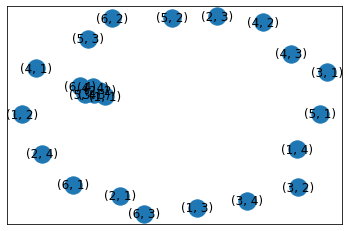

In [ ]:
nx.draw_networkx(graph_space)

In [ ]:
def generate_passes_network_for_starting11(matchid,team,color,color1):
  graph=nx.DiGraph()
  match_data=pd.DataFrame(sb.events(match_id=matchid, split=True, flatten_attrs=True,fmt="dict")).transpose()
  passes=pd.DataFrame(match_data["pass"].dropna())
  team_name=match_data.iloc[team]["team"]["name"]
  opponent_name=match_data.iloc[int(not team)]["team"]["name"]
  #print(team_name)
  team_index=[]
  for index in match_data["possession_team"].index:
    if match_data["possession_team"].loc[index]["name"]==team_name:
      team_index.append(index)

  #print(team_index)
  team_data=match_data.loc[team_index]

  #print(team_data)
  players=[]
  for player in match_data.iloc[team]["tactics"]["lineup"]:
    players.append(player["player"]["name"])
    graph.add_node(player["player"]["name"])

  weights= defaultdict(lambda: defaultdict(int))
  pass_data=pd.DataFrame(team_data["pass"].dropna())
  
  pass_index=pass_data.index
  #print(pass_data)
  positions=defaultdict(list)
  for index in pass_index:
    try:
      recieve_pass=match_data["player"].loc[index]["name"]
      give_pass=passes["pass"].loc[index]["recipient"]["name"]
      #print(recieve_pass,give_pass)
      if (recieve_pass in players) and (give_pass in players):
        weights[give_pass][recieve_pass]+=1
        positions[recieve_pass].append(passes["pass"].loc[index]["end_location"])
        positions[give_pass].append(match_data.loc[index]["location"])
        graph.add_edge(give_pass,recieve_pass,weight=1/weights[give_pass][recieve_pass])
      else:
        pass
    except KeyError:
      continue

  avg_positions=defaultdict(int)
  for p in positions:
    avg_positions[p]=np.sum(np.array(positions[p]),axis=0)/len(np.array(positions[p]))
    avg_positions[p]=[130*avg_positions[p][0]/120,90-(90*avg_positions[p][1]/80)]

  fig=plt.figure(figsize=(13,11))
  ax=fig.add_subplot(1,1,1)


  plt.plot([0,0],[0,90], color="black")
  plt.plot([0,130],[90,90], color="black")
  plt.plot([130,130],[90,0], color="black")
  plt.plot([130,0],[0,0], color="black")
  plt.plot([65,65],[0,90], color="black")

#Left Penalty Area
  plt.plot([16.5,16.5],[65,25],color="black")
  plt.plot([0,16.5],[65,65],color="black")
  plt.plot([16.5,0],[25,25],color="black")

#Right Penalty Area
  plt.plot([130,113.5],[65,65],color="black")
  plt.plot([113.5,113.5],[65,25],color="black")
  plt.plot([113.5,130],[25,25],color="black")

#Left 6-yard Box
  plt.plot([0,5.5],[54,54],color="black")
  plt.plot([5.5,5.5],[54,36],color="black")
  plt.plot([5.5,0.5],[36,36],color="black")

#Right 6-yard Box
  plt.plot([130,124.5],[54,54],color="black")
  plt.plot([124.5,124.5],[54,36],color="black")
  plt.plot([124.5,130],[36,36],color="black")

#Prepare Circles
  centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
  centreSpot = plt.Circle((65,45),0.8,color="black")
  leftPenSpot = plt.Circle((11,45),0.8,color="black")
  rightPenSpot = plt.Circle((119,45),0.8,color="black")

#Draw Circles
  ax.add_patch(centreCircle)
  ax.add_patch(centreSpot)
  ax.add_patch(leftPenSpot)
  ax.add_patch(rightPenSpot)

#Prepare Arcs
  leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
  rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
  ax.add_patch(leftArc)
  ax.add_patch(rightArc)

#Tidy Axes
  plt.axis('off')
  
  edges=graph.edges()
  weights = [graph[u][v]['weight'] for u,v in edges]
  plt.title("Passing Network for "+team_name+" in the game between "+opponent_name+" and "+team_name)
  nx.draw_networkx(graph,node_color=color,font_color=color1, width=(np.array(weights)**-1)/2,pos=avg_positions,edge_color="lightgrey")
  return graph,avg_positions

In [ ]:
tournament_id=pd.DataFrame(sb.matches(competition_id=55	,season_id=43	)).transpose()

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [ ]:
tournament_id.transpose()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3788753,2021-06-16,15:00:00.000,Europe - UEFA Euro,2020,Finland,Russia,0,1,available,...,2021-09-22T16:39:05.697512,2,Group Stage,Saint-Petersburg Stadium,Danny Desmond Makkelie,Markku Kanerva,Stanislav Cherchesov,1.1.0,2,2
1,3788765,2021-06-20,18:00:00.000,Europe - UEFA Euro,2020,Switzerland,Turkey,3,1,available,...,2021-11-11T13:54:37.507376,3,Group Stage,Bakı Olimpiya Stadionu,Slavko Vinčić,Vladimir Petković,Şenol Güneş,1.1.0,2,2
2,3795107,2021-07-02,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Italy,1,2,available,...,2021-09-23T00:02:51.495862,5,Quarter-finals,Allianz Arena,Slavko Vinčić,Roberto Martínez Montoliú,Roberto Mancini,1.1.0,2,2
3,3795221,2021-07-07,21:00:00.000,Europe - UEFA Euro,2020,England,Denmark,2,1,available,...,2021-09-22T22:33:37.494366,6,Semi-finals,Wembley Stadium,Danny Desmond Makkelie,Gareth Southgate,Kasper Hjulmand,1.1.0,2,2
4,3795506,2021-07-11,21:00:00.000,Europe - UEFA Euro,2020,Italy,England,1,1,available,...,2021-09-22T22:40:31.690550,7,Final,Wembley Stadium,Björn Kuipers,Roberto Mancini,Gareth Southgate,1.1.0,2,2
5,3794688,2021-06-29,18:00:00.000,Europe - UEFA Euro,2020,England,Germany,2,0,available,...,2021-09-22T23:46:25.457149,4,Round of 16,Wembley Stadium,Danny Desmond Makkelie,Gareth Southgate,Joachim Löw,1.1.0,2,2
6,3794692,2021-06-29,21:00:00.000,Europe - UEFA Euro,2020,Sweden,Ukraine,1,2,available,...,2021-09-22T23:38:19.483199,4,Round of 16,Hampden Park,Daniele Orsato,Jan Olof Andersson,Andrii Shevchenko,1.1.0,2,2
7,3794686,2021-06-28,18:00:00.000,Europe - UEFA Euro,2020,Croatia,Spain,3,5,available,...,2021-09-22T23:30:10.428563,4,Round of 16,Parken,Cüneyt Çakιr,Zlatko Dalić,Luis Enrique Martínez García,1.1.0,2,2
8,3794687,2021-06-27,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Portugal,1,0,available,...,2021-09-22T16:40:48.020474,4,Round of 16,Estadio de La Cartuja,Felix Brych,Roberto Martínez Montoliú,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
9,3794685,2021-06-26,21:00:00.000,Europe - UEFA Euro,2020,Italy,Austria,2,1,available,...,2021-09-22T16:40:41.310001,4,Round of 16,Wembley Stadium,Anthony Taylor,Roberto Mancini,Franco Foda,1.1.0,2,2


In [ ]:
match_data

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,goalkeeper,out,clearance,off_camera,foul_committed,foul_won,ball_recovery,substitution,50_50,miscontrol
9427b18a-6b10-411f-90da-3d6240b80c71,9427b18a-6b10-411f-90da-3d6240b80c71,1,1,00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 1835, 'name': 'Finland'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542c58bf-5c6c-43ca-9d8d-e086c7f08aaf,542c58bf-5c6c-43ca-9d8d-e086c7f08aaf,2,1,00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 1835, 'name': 'Finland'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a0dfe8a0-a0b9-443e-89e3-a8ba6596fa33,a0dfe8a0-a0b9-443e-89e3-a8ba6596fa33,3,1,00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 1835, 'name': 'Finland'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c7156352-f4b7-4140-aa51-6e26fd019a11,c7156352-f4b7-4140-aa51-6e26fd019a11,4,1,00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 1835, 'name': 'Finland'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94dbc5c3-ef37-445e-9154-3d9f9ea9245d,94dbc5c3-ef37-445e-9154-3d9f9ea9245d,5,1,00:00:00.490,0,0,"{'id': 30, 'name': 'Pass'}",2,"{'id': 796, 'name': 'Russia'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cb0b71b7-48cb-4ddd-8b38-9421c3d6d0fc,cb0b71b7-48cb-4ddd-8b38-9421c3d6d0fc,3802,2,00:51:37.801,96,37,"{'id': 38, 'name': 'Miscontrol'}",209,"{'id': 796, 'name': 'Russia'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7d5c4ef9-f905-484d-886c-5e1e88788836,7d5c4ef9-f905-484d-886c-5e1e88788836,3803,2,00:51:45.940,96,45,"{'id': 30, 'name': 'Pass'}",210,"{'id': 1835, 'name': 'Finland'}","{'id': 4, 'name': 'From Throw In'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002363dc-77ae-4fb6-9c67-53200bbb953c,002363dc-77ae-4fb6-9c67-53200bbb953c,3804,2,00:51:47.881,96,47,"{'id': 42, 'name': 'Ball Receipt*'}",210,"{'id': 1835, 'name': 'Finland'}","{'id': 4, 'name': 'From Throw In'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0703cafe-905e-4f8f-8e94-29635f1a655a,0703cafe-905e-4f8f-8e94-29635f1a655a,3805,2,00:51:49.036,96,49,"{'id': 34, 'name': 'Half End'}",210,"{'id': 1835, 'name': 'Finland'}","{'id': 4, 'name': 'From Throw In'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


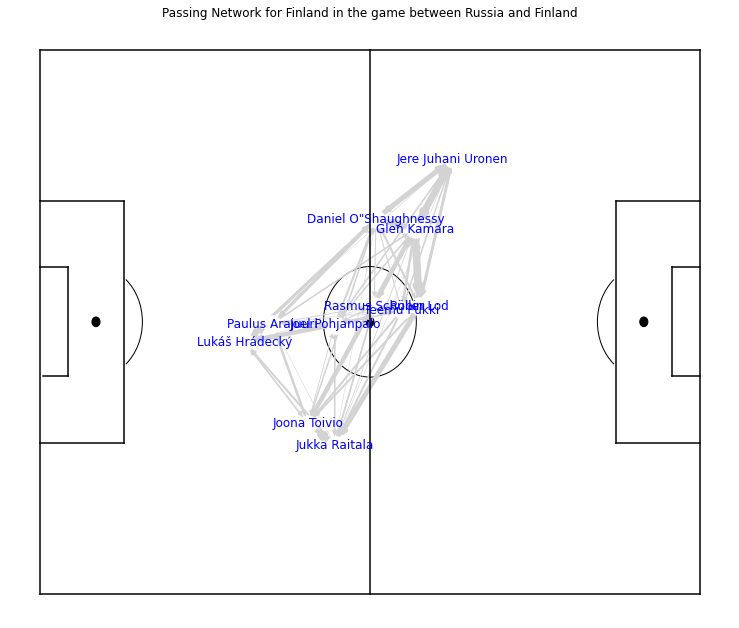

In [ ]:
g1,pos=generate_passes_network_for_starting11(3788753,0,"white","blue")

In [ ]:
pos

defaultdict(int,
            {'Daniel O"Shaughnessy': [66.19729437229437, 62.051785714285714],
             'Glen Kamara': [73.88139880952382, 60.40848214285715],
             'Jere Juhani Uronen': [81.3304292929293, 72.01363636363637],
             'Joel Pohjanpalo': [58.08877551020409, 44.533928571428575],
             'Joona Toivio': [52.79049479166666, 28.15312499999999],
             'Jukka Raitala': [58.0427966101695, 24.62987288135595],
             'Lukáš Hrádecký': [40.30471014492753, 41.6616847826087],
             'Paulus Arajuuri': [45.75277777777778, 44.679545454545455],
             'Rasmus Schüller': [65.84956140350879, 47.640789473684215],
             'Robin Lod': [74.72781124497992, 47.58614457831325],
             'Teemu Pukki': [71.25955284552848, 46.89329268292683]})

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


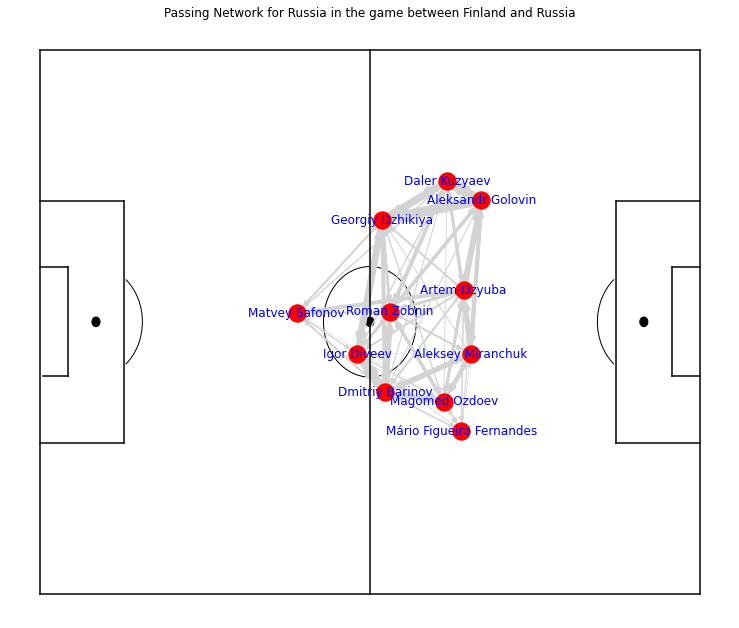

In [ ]:
g2,pos2=generate_passes_network_for_starting11(3788753,1,"red","blue")

In [ ]:
g2

In [ ]:
nx.average_clustering(g1)

0.8126293107605416

In [ ]:
nx.average_clustering(g2)

0.8439214833354718

In [ ]:
nx.transitivity(g1)

0.8078125

In [ ]:
nx.transitivity(g2)

0.8205521472392638

In [ ]:
avg = []
for i in set(nx.nodes(g2)):
    print(nx.clustering(g2,i),i)
    avg.append(nx.clustering(g2,i))
print(sum(avg)/len(avg))

0.9166666666666666 Mário Figueira Fernandes
0.8787878787878788 Aleksey Miranchuk
0.8333333333333334 Daler Kuzyaev
0.7839506172839507 Magomed Ozdoev
0.8761061946902655 Georgiy Dzhikiya
0.7592592592592593 Dmitriy Barinov
0.8495575221238938 Aleksandr Golovin
0.8103448275862069 Roman Zobnin
0.845 Artem Dzyuba
0.9508196721311475 Matvey Safonov
0.7793103448275862 Igor Diveev
0.8439214833354716


In [ ]:
nx.average_shortest_path_length(g2)

1.2

In [ ]:
nx.degree_centrality(g2)

{'Aleksandr Golovin': 1.6,
 'Aleksey Miranchuk': 1.5,
 'Artem Dzyuba': 1.5,
 'Daler Kuzyaev': 1.8,
 'Dmitriy Barinov': 1.9000000000000001,
 'Georgiy Dzhikiya': 1.6,
 'Igor Diveev': 1.8,
 'Magomed Ozdoev': 1.9000000000000001,
 'Matvey Safonov': 1.2000000000000002,
 'Mário Figueira Fernandes': 1.0,
 'Roman Zobnin': 1.8}

In [ ]:
nx.pagerank(g2)

{'Aleksandr Golovin': 0.06696344889001485,
 'Aleksey Miranchuk': 0.09051461212368318,
 'Artem Dzyuba': 0.05707490904062359,
 'Daler Kuzyaev': 0.0989278954780673,
 'Dmitriy Barinov': 0.0816080739576759,
 'Georgiy Dzhikiya': 0.09428129179193506,
 'Igor Diveev': 0.10321203041675052,
 'Magomed Ozdoev': 0.11937688304364051,
 'Matvey Safonov': 0.0954005740711842,
 'Mário Figueira Fernandes': 0.09578850477512528,
 'Roman Zobnin': 0.09685177641129976}

In [ ]:
nx.betweenness_centrality(g2,normalized=True,endpoints=False)

{'Aleksandr Golovin': 0.020105820105820106,
 'Aleksey Miranchuk': 0.015476190476190477,
 'Artem Dzyuba': 0.014656084656084657,
 'Daler Kuzyaev': 0.028730158730158727,
 'Dmitriy Barinov': 0.04992063492063492,
 'Georgiy Dzhikiya': 0.011322751322751323,
 'Igor Diveev': 0.03436507936507936,
 'Magomed Ozdoev': 0.03965608465608465,
 'Matvey Safonov': 0.0,
 'Mário Figueira Fernandes': 0.0,
 'Roman Zobnin': 0.030211640211640214}

In [ ]:
len(g2.edges)

88

In [ ]:
clo1=nx.closeness_centrality(g2, distance="weight")

In [ ]:
clo1

{'Aleksandr Golovin': 4.440083732584893,
 'Aleksey Miranchuk': 3.753425630332121,
 'Artem Dzyuba': 3.204935944127855,
 'Daler Kuzyaev': 4.177120770326169,
 'Dmitriy Barinov': 5.289481175609494,
 'Georgiy Dzhikiya': 4.6873170845917915,
 'Igor Diveev': 5.192731674279868,
 'Magomed Ozdoev': 3.866295598048897,
 'Matvey Safonov': 3.3213281365632246,
 'Mário Figueira Fernandes': 1.948440986723858,
 'Roman Zobnin': 5.282231717291806}

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


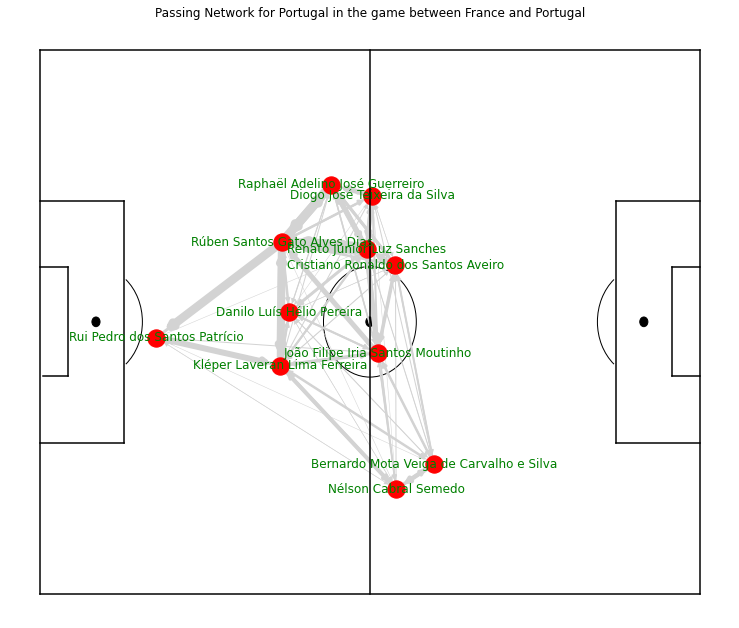

In [ ]:
g3,p3=generate_passes_network_for_starting11(3788773,0,"Red","Green")

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


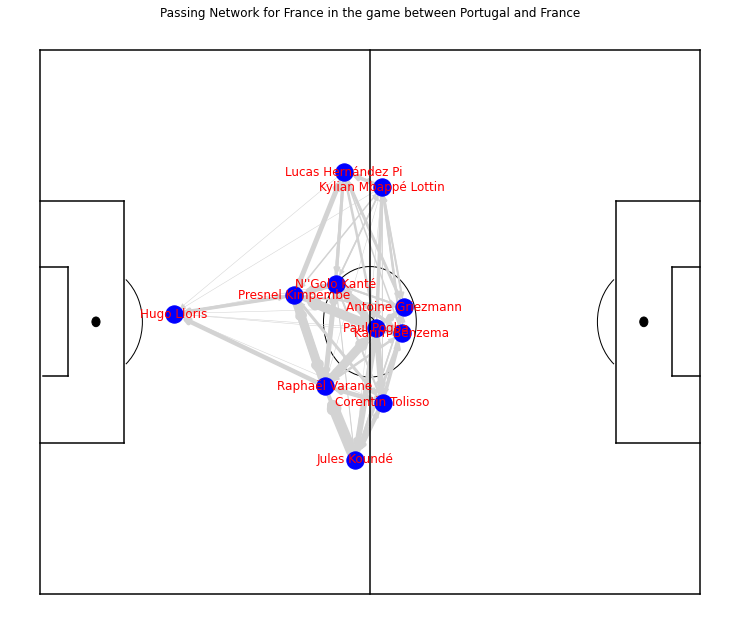

In [ ]:
g,p=generate_passes_network_for_starting11(3788773,1,"Blue","Red")

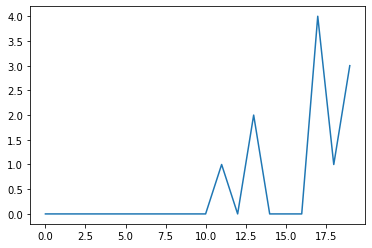

In [ ]:
plt.plot(nx.degree_histogram(g))

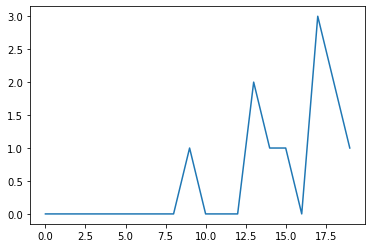

In [ ]:
plt.plot(nx.degree_histogram(g3))

In [ ]:
def generate_passes_network_data_for_starting11(matchid,team):
  graph=nx.DiGraph()
  match_data=pd.DataFrame(sb.events(match_id=matchid, split=True, flatten_attrs=True,fmt="dict")).transpose()
  passes=pd.DataFrame(match_data["pass"].dropna())
  team_name=match_data.iloc[team]["team"]["name"]
  opponent_name=match_data.iloc[int(not team)]["team"]["name"]
  #print(team_name)
  team_index=[]
  for index in match_data["possession_team"].index:
    if match_data["possession_team"].loc[index]["name"]==team_name:
      team_index.append(index)

  #print(team_index)
  team_data=match_data.loc[team_index]

  #print(team_data)
  players=[]
  for player in match_data.iloc[team]["tactics"]["lineup"]:
    players.append(player["player"]["name"])
    graph.add_node(player["player"]["name"])

  weights= defaultdict(lambda: defaultdict(int))
  pass_data=pd.DataFrame(team_data["pass"].dropna())
  
  pass_index=pass_data.index
  #print(pass_data)
  positions=defaultdict(list)
  for index in pass_index:
    try:
      recieve_pass=match_data["player"].loc[index]["name"]
      give_pass=passes["pass"].loc[index]["recipient"]["name"]
      #print(recieve_pass,give_pass)
      if (recieve_pass in players) and (give_pass in players):
        weights[give_pass][recieve_pass]+=1
        positions[recieve_pass].append(passes["pass"].loc[index]["end_location"])
        positions[give_pass].append(match_data.loc[index]["location"])
        graph.add_edge(give_pass,recieve_pass,weight=1/weights[give_pass][recieve_pass])
      else:
        pass
    except KeyError:
      continue

  avg_positions=defaultdict(int)
  for p in positions:
    avg_positions[p]=np.sum(np.array(positions[p]),axis=0)/len(np.array(positions[p]))
    avg_positions[p]=[130*avg_positions[p][0]/120,90-(90*avg_positions[p][1]/80)]

  return graph,avg_positions

In [ ]:
g,p=generate_passes_network_data_for_starting11(3788773,1)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [ ]:
matches=np.array(sb.matches(competition_id=55, season_id=43)["match_id"])

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [ ]:
degree_distribution=[]
for match_id in matches:
  g,p=generate_passes_network_data_for_starting11(match_id,1)
  degree_distribution.append(nx.degree_histogram(g))
  g,p=generate_passes_network_data_for_starting11(match_id,0)
  degree_distribution.append(nx.degree_histogram(g))

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [ ]:
g.in_degree()

InMultiDegreeView({'Danny Ward': 25, 'Connor Roberts': 28, 'Christopher James Mepham': 20, 'Joe Rodon': 28, 'Ben Davies': 39, 'Joe Allen': 31, 'Gareth Frank Bale': 22, 'Joseff Morrell': 29, 'Aaron Ramsey': 33, 'Daniel James': 14, 'Kieffer Roberto Francisco Moore': 12})

In [ ]:
g.out_degree()

OutMultiDegreeView({'Danny Ward': 4, 'Connor Roberts': 28, 'Christopher James Mepham': 14, 'Joe Rodon': 22, 'Ben Davies': 31, 'Joe Allen': 28, 'Gareth Frank Bale': 36, 'Joseff Morrell': 25, 'Aaron Ramsey': 32, 'Daniel James': 25, 'Kieffer Roberto Francisco Moore': 36})

In [ ]:
g.degree()

DiMultiDegreeView({'Danny Ward': 29, 'Connor Roberts': 56, 'Christopher James Mepham': 34, 'Joe Rodon': 50, 'Ben Davies': 70, 'Joe Allen': 59, 'Gareth Frank Bale': 58, 'Joseff Morrell': 54, 'Aaron Ramsey': 65, 'Daniel James': 39, 'Kieffer Roberto Francisco Moore': 48})

In [ ]:
for i in range(len(nx.degree_histogram(g))):
  if nx.degree_histogram(g)[i]==1:
    print(i)

29
34
39
48
50
54
56
58
59
65
70


In [ ]:
avg_degree_dist=np.zeros(300)
for i in degree_distribution:
  for j in range(len(i)):
    avg_degree_dist[j]+=i[j]

In [ ]:
avg_degree_dist=avg_degree_dist/len(degree_distribution)

In [ ]:
avg_degree_dist

array([0.        , 0.        , 0.        , 0.        , 0.00980392,
       0.        , 0.00980392, 0.        , 0.00980392, 0.        ,
       0.00980392, 0.00980392, 0.00980392, 0.02941176, 0.01960784,
       0.01960784, 0.00980392, 0.02941176, 0.02941176, 0.02941176,
       0.01960784, 0.01960784, 0.05882353, 0.02941176, 0.03921569,
       0.05882353, 0.07843137, 0.06862745, 0.07843137, 0.10784314,
       0.05882353, 0.06862745, 0.09803922, 0.07843137, 0.14705882,
       0.12745098, 0.10784314, 0.08823529, 0.14705882, 0.09803922,
       0.18627451, 0.09803922, 0.1372549 , 0.15686275, 0.11764706,
       0.09803922, 0.16666667, 0.14705882, 0.16666667, 0.18627451,
       0.11764706, 0.07843137, 0.12745098, 0.18627451, 0.12745098,
       0.11764706, 0.10784314, 0.11764706, 0.20588235, 0.10784314,
       0.12745098, 0.14705882, 0.12745098, 0.08823529, 0.21568627,
       0.07843137, 0.11764706, 0.08823529, 0.17647059, 0.14705882,
       0.17647059, 0.09803922, 0.06862745, 0.07843137, 0.06862

In [ ]:
g.degree()

DiMultiDegreeView({'Danny Ward': 29, 'Connor Roberts': 56, 'Christopher James Mepham': 34, 'Joe Rodon': 50, 'Ben Davies': 70, 'Joe Allen': 59, 'Gareth Frank Bale': 58, 'Joseff Morrell': 54, 'Aaron Ramsey': 65, 'Daniel James': 39, 'Kieffer Roberto Francisco Moore': 48})

In [ ]:
def avg_degree_distribution(team):
  d=sb.matches(competition_id=55, season_id=43)
  match_id=[]
  match_team=[]
  for index in np.array(d[d["home_team"]==team]["match_id"]):
    match_id.append(index)
    match_team.append(0)
  for index in np.array(d[d["away_team"]==team]["match_id"]):
    match_id.append(index)
    match_team.append(1)

  degree_distribution=[]
  for i in range(len(match_id)):
    g,p=generate_passes_network_data_for_starting11(match_id[i],match_team[i])
    degree_distribution.append(nx.degree_histogram(g))

  avg_degree_dist=np.zeros(300)
  for i in degree_distribution:
    for j in range(len(i)):
      avg_degree_dist[j]+=i[j]
  avg_degree_dist=avg_degree_dist/len(degree_distribution)

  return(avg_degree_dist)

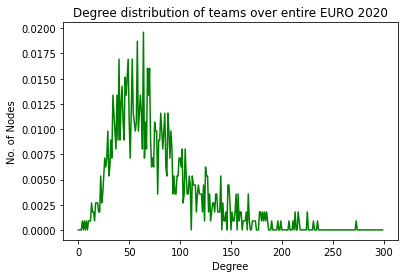

In [ ]:
plt.plot(avg_degree_dist/11,label="Average of all teams",color='GREEN')
plt.xlabel("Degree")
plt.ylabel("No. of Nodes")
plt.title("Degree distribution of teams over entire EURO 2020")
plt.show()

In [ ]:
np.sum(avg_degree_dist/11)

1.0

In [ ]:
sum_degree=np.sum([i*avg_degree_dist[i] for i in range(len(avg_degree_dist)) ])

In [ ]:
sum_degree

828.5294117647059

In [ ]:
p=sum_degree/10

In [ ]:
p

82.85294117647058

In [ ]:
np.sum(avg_degree_dist)

11.0

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)
/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)
/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)
/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


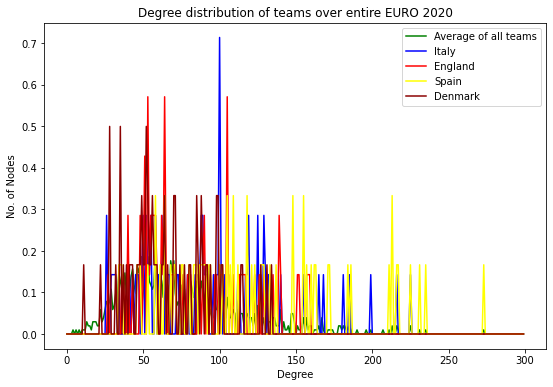

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(avg_degree_dist,label="Average of all teams",color='GREEN')
plt.plot(avg_degree_distribution("Italy"),label="Italy",color="Blue")
plt.plot(avg_degree_distribution("England"),label="England",color="Red")
plt.plot(avg_degree_distribution("Spain"),label="Spain",color="Yellow")
plt.plot(avg_degree_distribution("Denmark"),label="Denmark",color="darkred")

plt.legend()

plt.xlabel("Degree")
plt.ylabel("No. of Nodes")
plt.title("Degree distribution of teams over entire EURO 2020")
plt.show()

In [ ]:
c=0
s=0
for i in range(len(avg_degree_dist)):
  c+=i*avg_degree_dist[i]
  s+=avg_degree_dist[i]

In [ ]:
s

10.999999999999982

In [ ]:
c/(11*(10))

7.532085561497322

In [ ]:
p=c/10

In [ ]:
p

82.85294117647054

In [ ]:
nx.degree(g3)

DiDegreeView({'Rui Pedro dos Santos Patrício': 9, 'Nélson Cabral Semedo': 15, 'Kléper Laveran Lima Ferreira': 18, 'Rúben Santos Gato Alves Dias': 17, 'Raphaël Adelino José Guerreiro': 13, 'Danilo Luís Hélio Pereira': 17, 'Bernardo Mota Veiga de Carvalho e Silva': 14, 'João Filipe Iria Santos Moutinho': 18, 'Renato Júnior Luz Sanches': 19, 'Diogo José Teixeira da Silva': 13, 'Cristiano Ronaldo dos Santos Aveiro': 17})

In [ ]:
def random_model(edges):
  players=11
  random_graph=nx.MultiDiGraph()
  for i in range(edges):
    p1=random.randint(0,10)
    player2=[]
    for j in range(0,11):
      if j!=p1:
        player2.append(j)
    p2=random.sample(player2,1)[0]
    random_graph.add_edge(p1,p2)
  
  return random_graph

In [ ]:
random_degree_distribution=[]

no_iter=1000
for i in range(no_iter):
  rg=random_model(int(828.5294117647059)//2)
  random_degree_distribution.append(np.array(nx.degree_histogram(rg))/11)

random_degree_distribution=np.array(random_degree_distribution)

avg_random_degree_distribution=np.zeros(300)
for i in random_degree_distribution:
  for j in range(len(i)):
    avg_random_degree_distribution[j]+=i[j]/no_iter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
random_degree_distribution.shape

(1000,)

In [ ]:
828/2

414.0

In [ ]:
rg=random_model(414)

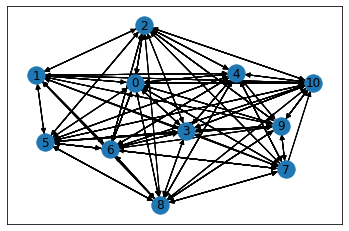

In [ ]:
nx.draw_networkx(rg)

In [ ]:
len(rg.edges())

414

In [ ]:
np.sum(rg.degree())

883

In [ ]:
np.sum(rg.in_degree())

469

In [ ]:
np.sum(rg.out_degree())

469

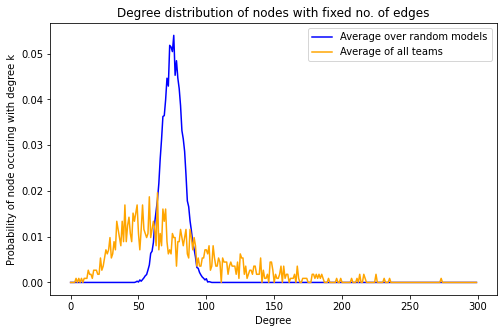

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(avg_random_degree_distribution,label="Average over random models",color="blue")
plt.plot(avg_degree_dist/11,label="Average of all teams",color='orange')
plt.xlabel("Degree")
plt.ylabel("Probability of node occuring with degree k")
plt.legend()
plt.title("Degree distribution of nodes with fixed no. of edges")
plt.show()

In [ ]:
np.sum(avg_degree_dist/11)

1.0

In [ ]:
np.array([1,2])+np.array([1,2])

array([2, 4])

In [ ]:
np.sum([i*avg_degree_dist for i in range(len(avg_degree_dist))])

493350.0